# Selection on plot

## Plot

In [18]:
# Restore file
import pandas as pd

filename = 'coma_lines.hdf'
coma_df = pd.read_hdf(filename)

In [19]:
# Use saved function
from utils import plotBPT

?plotBPT

Signature: plotBPT(halpha, hbeta, nii, oiii)
Docstring:
Plot a BPT diagram
Input: Halpha, Hbeta, [NII], and [OIII] fluxes
File:      ~/Carpentry/AstronomicalData/notebooks/utils.py
Type:      function

In [20]:
coma_df.columns

Index(['ra', 'dec', 'z', 'distance', 'h_beta_flux', 'h_beta_flux_err',
       'h_alpha_flux', 'h_alpha_flux_err', 'oiii_5007_flux', 'nii_6584_flux'],
      dtype='object')

/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


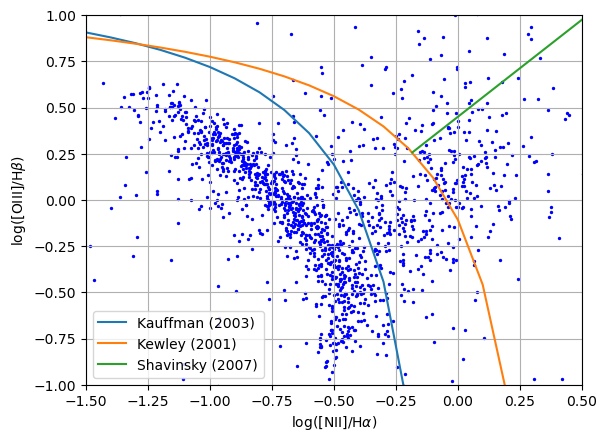

In [21]:
fig,ax = plotBPT(coma_df['h_alpha_flux'], 
                 coma_df['h_beta_flux'], 
                 coma_df['nii_6584_flux'], 
                 coma_df['oiii_5007_flux'])

## Define a polygon

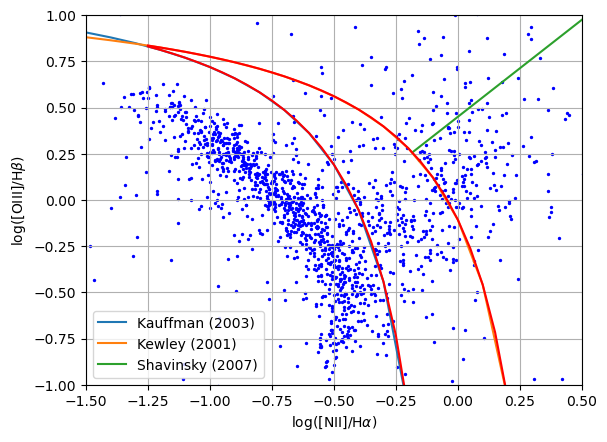

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plotBPT 

x1 = np.arange(-1.25,-0.18,0.05)
y1 = 0.61/(x1-0.05)+1.3
x2 = np.arange(-1.25,0.23,0.05)
y2 = 0.61/(x2-0.47)+1.19
x2r = x2[::-1]
y2r = y2[::-1]
import numpy as np
x_loop = np.append(x1, x2r)
y_loop = np.append(y1, y2r)

fig,ax = plotBPT(coma_df['h_alpha_flux'], 
                 coma_df['h_beta_flux'], 
                 coma_df['nii_6584_flux'], 
                 coma_df['oiii_5007_flux'])
ax.plot(x_loop, y_loop,color='red')

In [82]:
loop_df = pd.DataFrame()
loop_df['x_loop'] = x_loop
loop_df['y_loop'] = y_loop
loop_df.head()
from matplotlib.patches import Polygon

polygon_comp = Polygon(loop_df,  facecolor='red',alpha=0.2)
polygon_comp

### Exercise

polygon has a function called contains_points

Check if the two points (0.,-0.5) and  (-0.5, -0.25) are inside.

You can create a list:   points = [(0.,-0.5) ,(-0.5, -0.25)] and pass it to the function.

In [83]:
points = [(0.,-0.5) ,(-0.5, -0.25)] 
polygon_comp.contains_points(points)

array([ True, False])

In [84]:
bpt_df = pd.DataFrame()
bpt_df['NII_Ha'] = np.log10(coma_df['nii_6584_flux']) - np.log10(coma_df['h_alpha_flux'])
bpt_df['OIII_Hb'] = np.log10(coma_df['oiii_5007_flux']) - np.log10(coma_df['h_beta_flux'])
bpt_df.head()

/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/dfadda/miniconda3/envs/AstronomicalData/lib/python3.14/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,NII_Ha,OIII_Hb
0,-0.229622,0.599468
1,-0.755203,0.151970
2,-0.763062,-0.015017
3,-0.742192,-0.013417
4,-0.823187,0.190870


In [85]:
inside_mask_comp = polygon_comp.contains_points(bpt_df)
inside_mask_comp

array([False, False, False, ..., False, False, False], shape=(1834,))

### Exercise

Boolean values are stored as 0s and 1s. FALSE = 0 and TRUE = 1. 

Use this information to determine the number of stars that fall inside the polygon.

In [86]:
inside_mask_comp.sum()

np.int64(213)

## Selecting points inside the polygon

In [87]:
composite_df = coma_df[inside_mask_comp]

In [88]:
composite_df

,ra,dec,z,distance,h_beta_flux,h_beta_flux_err,h_alpha_flux,h_alpha_flux_err,oiii_5007_flux,nii_6584_flux
5,187.44823,27.243340,0.024639,401.382880,50.516470,4.479331,193.07160,6.332228,22.480980,93.551670
24,196.52688,28.701767,0.018547,93.689558,1.591519,2.256939,22.09561,1.720440,1.102237,11.643730
26,196.23649,29.092447,0.019916,94.993736,3.103315,1.676619,12.63831,1.193748,5.690322,4.655965
35,196.07468,29.029535,0.022766,86.345323,5.790872,3.563462,10.95231,3.916704,7.555208,5.871634
45,195.43072,29.044668,0.023730,68.609549,105.108000,5.543285,598.04580,10.350800,57.081610,276.408800
...,...,...,...,...,...,...,...,...,...,...
1784,194.94724,21.813210,0.023848,370.067572,286.898400,6.714223,2048.87100,16.924240,113.489100,1486.838000
1809,199.37482,20.684193,0.023330,499.982515,106.464100,4.267833,333.15750,7.066043,74.064960,219.226900
1812,199.33245,20.638070,0.022869,501.319788,138.839100,3.971771,762.84750,8.234986,44.629870,477.890500
1814,198.95091,19.635946,0.022785,546.561388,10.459320,1.880897,30.63363,2.191602,20.815290,12.700920


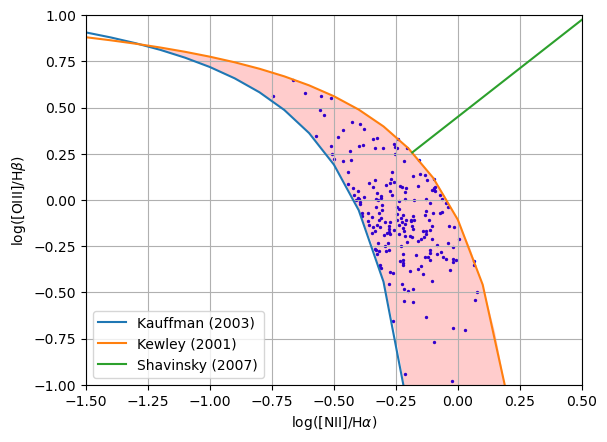

In [89]:
fig,ax = plotBPT(composite_df['h_alpha_flux'], 
                 composite_df['h_beta_flux'], 
                 composite_df['nii_6584_flux'], 
                 composite_df['oiii_5007_flux'])
ax.add_patch(polygon_comp)
plt.show()

### Exercise

Select the points right of the Kewley's curve and under the Shavinsky's curve (LINERs).
The x of intersection is -0.18380687748557267

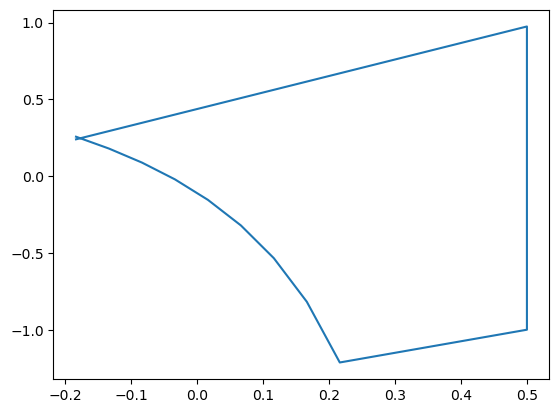

In [107]:
x0 = -0.18380687748557267
x1 = np.arange(x0,0.23,0.05)
y1 = 0.61/(x1-0.47)+1.19
x_loop = np.append(x1,np.array([0.5,0.5,x0]))
y_loop = np.append(y1,np.array([-1.0, 1.05*0.5+0.45, -1.05*0.2+0.45]))
plt.plot(x_loop, y_loop)

In [108]:
from matplotlib.patches import Polygon

loop_df = pd.DataFrame()
loop_df['x_loop'] = x_loop
loop_df['y_loop'] = y_loop
loop_df.head()

polygon_liner = Polygon(loop_df, facecolor='orange',alpha=0.2)
inside_mask_liner = polygon_liner.contains_points(bpt_df)
liner_df = coma_df[inside_mask_liner]

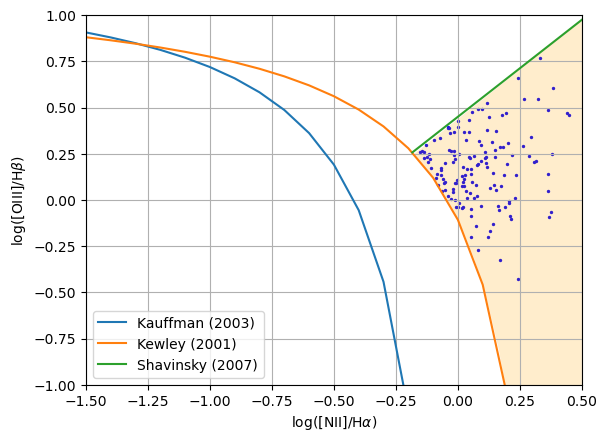

In [109]:
fig,ax = plotBPT(liner_df['h_alpha_flux'], 
                 liner_df['h_beta_flux'], 
                 liner_df['nii_6584_flux'], 
                 liner_df['oiii_5007_flux'])
ax.add_patch(polygon_liner)
plt.show()

### Exercise

Select star forming galaxies (Under Kauffman's curve)

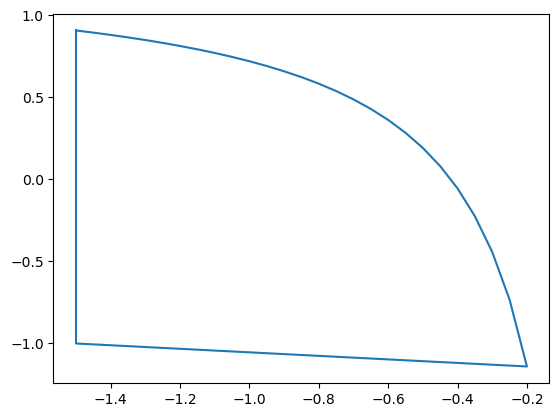

In [130]:
x1 = np.arange(-1.5,-0.15,0.05)
y1 = 0.61/(x1-0.05)+1.3
x_loop = np.append(x1,np.array([-1.5,x1[0]]))
y_loop = np.append(y1,np.array([-1.0,y1[0]]))
plt.plot(x_loop, y_loop);

In [131]:
from matplotlib.patches import Polygon

loop_df = pd.DataFrame()
loop_df['x_loop'] = x_loop
loop_df['y_loop'] = y_loop
loop_df.head()

polygon_sf = Polygon(loop_df, facecolor='blue',alpha=0.2)
inside_mask_sf = polygon_sf.contains_points(bpt_df)
sf_df = coma_df[inside_mask_sf]

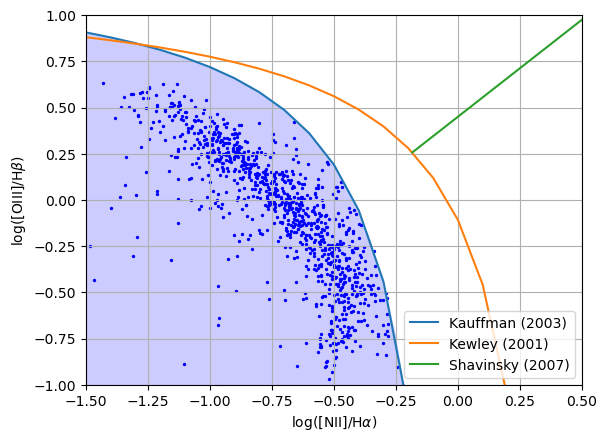

In [132]:
fig,ax = plotBPT(sf_df['h_alpha_flux'], 
                 sf_df['h_beta_flux'], 
                 sf_df['nii_6584_flux'], 
                 sf_df['oiii_5007_flux'])
ax.add_patch(polygon_sf)
plt.show()

### Exercise

Select Seyfert galaxies (Right of Kewley's curve and over Shavinsky's curve)

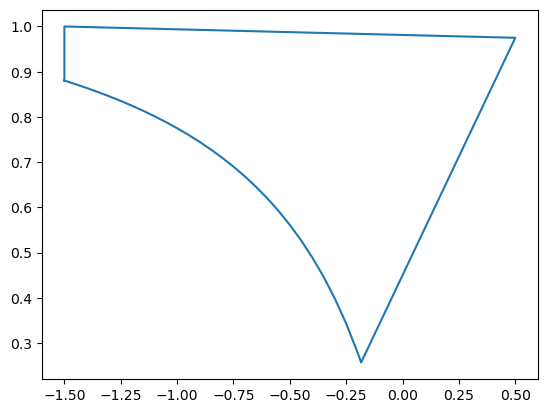

In [114]:
x0 = -0.18380687748557267
x1 = np.arange(-1.5, x0, 0.05)
y1 = 0.61/(x1-0.47)+1.19
x_loop = np.append(x1,np.array([x0,     0.5,    -1.5,x1[0]]))
y_loop = np.append(y1,np.array([1.05*x0+0.45,1.05*0.5+0.45,  1,y1[0]]))
plt.plot(x_loop, y_loop)

In [115]:
from matplotlib.patches import Polygon

loop_df = pd.DataFrame()
loop_df['x_loop'] = x_loop
loop_df['y_loop'] = y_loop
loop_df.head()

polygon_sy = Polygon(loop_df, facecolor='green',alpha=0.2)
inside_mask_sy = polygon_sy.contains_points(bpt_df)
sy_df = coma_df[inside_mask_sy]

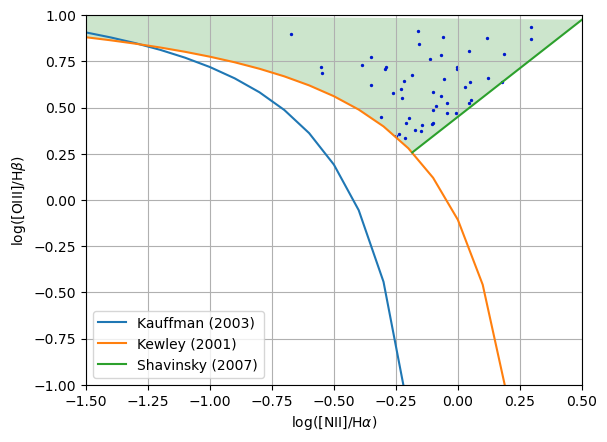

In [117]:
fig,ax = plotBPT(sy_df['h_alpha_flux'], 
                 sy_df['h_beta_flux'], 
                 sy_df['nii_6584_flux'], 
                 sy_df['oiii_5007_flux'])
ax.add_patch(polygon_sy)
plt.show()

## Adding column with type

In [151]:
# Add types 
coma_df.loc[inside_mask_sf,'Type'] = 'SF'
coma_df.loc[inside_mask_liner,'Type'] = 'LINER'
coma_df.loc[inside_mask_comp,'Type'] = 'COMP'
coma_df.loc[inside_mask_sy,'Type'] = 'SY'

In [152]:
# Save
filename = 'coma_lines.hdf'
coma_df.to_hdf(filename, key='coma_df', mode='w')

/var/folders/15/ndh_cvrn3tn0rz5tz4xkn4tw0005p5/T/ipykernel_64443/3424538193.py:3: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block1_values] [items->Index(['Type'], dtype='object')]

  coma_df.to_hdf(filename, key='coma_df', mode='w')


In [ ]:
# How to drop a column
coma_df.drop(['Type'], axis='columns', inplace=True)